# Data Science Practice - Predicting Home Prices

## Murali Behara, MS(Physics), MBA

<b> HERE ARE ALL(20) THE VARIABLES THAT CONTAIN DATA RELATED TO HOME PRICES INCLUDING PRICES (WE'LL DISCOVER CORRELATION)</b>

<b>01. id</b> :a notation for a house

<b>02. date</b>: Date house was sold

<b>03. price</b>: Price is prediction target

<b>04. bedrooms</b>: Number of Bedrooms/House

<b>05. bathrooms</b>: Number of bathrooms/bedrooms

<b>06. sqft_living</b>: square footage of the home

<b>07. sqft_lot</b>: square footage of the lot

<b>08. floors</b> :Total floors (levels) in house

<b>09. waterfront</b> :House which has a view to a waterfront

<b>10. view</b>: Has been viewed

<b>11. condition</b> :How good the condition is  Overall

<b>12. grade</b>: overall grade given to the housing unit, based on King County grading system

<b>13. sqft_above</b> :square footage of house apart from basement

<b>14. sqft_basement</b>: square footage of the basement

<b>15. yr_built</b> :Built Year

<b>16. yr_renovated</b> :Year when house was renovated

<b>17. zipcode</b>:zip code

<b>18. lat</b>: Latitude coordinate

<b>19. long</b>: Longitude coordinate

<b>20. sqft_living15</b> :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

<b>21. sqft_lot15</b> :lotSize area in 2015(implies-- some renovations)

## Import Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

# Use read_csv() to read a file into a data frame
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

# Use head() to display the first 5 records in the data frame 
print("\n Top records aka the head of the data frame is - \n") 
df.head()


 Top records aka the head of the data frame is : 



,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
# Use dtypes to display all the data types in the data frame
print("\n Data types in the head of the data frame are - \n") 
df.dtypes



 Data types in the head of the data frame are - 



Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [14]:
# Display the statistical summary of the data 
print("\n Descriptive Statistics of the data in the data frame - \n") 
df.describe()


 Descriptive Statistics of the data in the data frame - 



,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Wrangle with Data

In [15]:
# Drop the columns "id" & "Unnamed: 0". axis=1 to represent y-axis / columns & inplace=True to persist changes to data frame
# Use the method describe() to obtain a statistical summary to ensure that the changes are persisted
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

# Display the statistical summary of the data 
print("\n Descriptive Statistics of the data in the data frame - \n") 
df.describe()



 Descriptive Statistics of the data in the data frame - 



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [39]:
# Check for missing data (NaN) in the dataframe; got an error when trying to invoke the lm.fit() indicating there may be nulls
missing_data = df.isnull().sum()
print("\nSummary of Missing Data: \n------------------------\n")
missing_data

# Another way is to iterate through the columns in a data frame when the data frame is very large. 

#for column in missing_data.columns.values.tolist():
#   print(missing_data[column].value_counts())
#   print("")    


Summary of Missing Data: 
------------------------



date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [45]:
# Calculate the average number of Bed Rooms & Bath Rooms
avgBedRooms=df['bedrooms'].mean()# Display the statistical summary of the data 
print ("\nAverage Number of Bedrooms: \n----------------------------\n",avgBedRooms)

avgBathRooms=df['bathrooms'].mean()# Display the statistical summary of the data 
print ("\nAverage Number of Bathrooms: \n----------------------------\n",avgBathRooms)



Average Number of Bedrooms: 
----------------------------
 3.37287037037037

Average Number of Bathrooms: 
----------------------------
 2.1157362403369904


In [46]:
# Execute an inplace replacement of bedrooms & bathrooms 
df['bedrooms'].replace(np.nan, avgBedRooms, inplace=True)
df['bathrooms'].replace(np.nan, avgBathRooms, inplace=True)

#Ensure that the inplace substitutions are effective; counts for the NaN should be zero for each
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


## Visualize Data

In [164]:
# Use value_counts() to count the no. of houses with unique floor values & convert it to a data frame using to_frame()
print("MB2019")
floorsList = df['floors']
floorsList.value_counts().to_frame()

MB2019


,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


MB2019


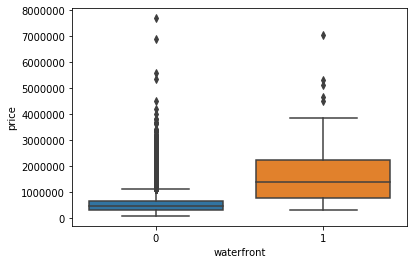

In [161]:
# Use boxplot() of seaborn library visualize that houses with waterfront has fewer price outliers (not whole lot to bargain)
print("MB2019")
ax = sns.boxplot(x=df['waterfront'], y=df['price'])

MB2019


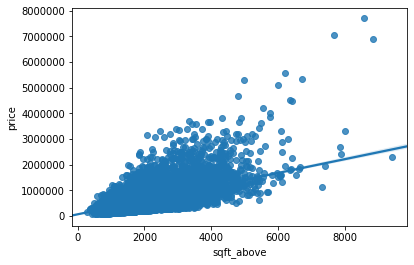

In [165]:
# Use regplot() of seaborn library to confirm the intuition that square footage excluding basement (sqft_above) 
#  is positively correlated with price.
print("MB2019")
ax = sns.regplot(x=df['sqft_above'], y=df['price'])

In [166]:
# Use corr() method of pandas library to find out the values that are highly correlated to price using sort_values()
print("MB2019")
df.corr()['price'].sort_values()

MB2019


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## Model the Data to make predictions

### First we see that there's no correlation between longitude and price

MB2019

The variance (R square) of the price data is:  0.00046769430149007363

The equation to the simple linear regression model is: Y =  [[56377.72275781]] X +  [7430229.31043568]


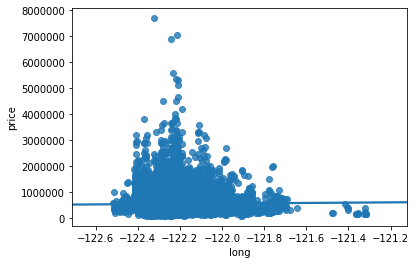

In [167]:
# Import the libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create a simple linear regression model using the longitude & price of the house & calculate the variance (R square)

# Select the list of values for longitude & price
X = df[['long']]  #longitude on X axis
Y = df[['price']] #price on Y axixs

# Simple linear equation takes the form Y = MX + C & we can compute the slope 'M' & the Y-intercept 'C'
lr = LinearRegression()

# Use the fit() method of LinearRegression to fit the data to simple linear model
lr.fit(X,Y)

# Compute the variance of price based on longitude. 
print("MB2019")
print("\nThe variance (R square) of the price data is: ", lr.score(X,Y))
print("\nThe equation to the simple linear regression model is: Y = ",lr.coef_,"X + ", lr.intercept_)

# Also visualize the linear regression model using seaborn regplot()
ax = sns.regplot(x=df['long'], y=df['price'])


### Next we will see that there is a positive correlation between square footage of home & price  

MB2019

The variance (R square) of the price data based on sqft_living is:  0.49285321790379316

The equation to the simple linear regression model is: Y =  [[280.6235679]] X +  [-43580.74309447]


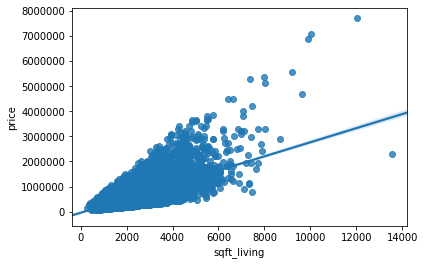

In [168]:
# Create a simple linear regression model using square footage of living area & price of the house & calc variance (R square)

# Select the list of values for longitude & price
X = df[['sqft_living']]  #sqft_living on X axis
Y = df[['price']] #price on Y axixs

# Simple linear equation takes the form Y = MX + C & we can compute the slope 'M' & the Y-intercept 'C'
lr = LinearRegression()

# Use the fit() method of LinearRegression to fit the data to simple linear model
lr.fit(X,Y)

# Compute the variance of price based on longitude. 
print("MB2019")
print("\nThe variance (R square) of the price data based on sqft_living is: ", lr.score(X,Y))
print("\nThe equation to the simple linear regression model is: Y = ",lr.coef_,"X + ", lr.intercept_)

# Also visualize the linear regression model using seaborn regplot()
ax = sns.regplot(x=df['sqft_living'], y=df['price'])

### Next using the 11 select features and a polynomial regression model we will try and predict a price 

#### For Visualization to Distinguish Predicted vs Actual define a Plot utilizing seaborn & matplotlib

In [144]:
def CurveFittingPlot(PredictedDataset, ActualDataset, PredictedDataName, ActualDataName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(PredictedDataset, hist=False, color="r", label=PredictedDataName)
    ax2 = sns.distplot(ActualDataset, hist=False, color="b", label=ActualDataName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Home Price (in dollars)')
    plt.ylabel('Proportion of Total Homes')

    plt.show()
    plt.close()
    

In [169]:
# Fit a polynomial based linear regression model to predict price using several variables. 
features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]  

# Create a data frame using the features to provide the same to the model
X = df[features]

# Fit the linear model using the above-mentioned 11 variables.
lr.fit(X, Y)

print("MB2019")

# Calculate R squared using score() method of LinearRegression object
rSquared = lr.score(X, Y)
print("\n The variance  R squared of the price, based on all the 11 features is : ", rSquared)

# Calculate the intercept & the list of coefficients of the linear regression model

# The Y intercept is
print("\n The intercept of the multiple linear regression model is: ", lr.intercept_ )

# The X coefficients are 
print("\n The 11 coefficients of the multiple linear regression model are: ", lr.coef_)

# Predict the prices using predict() method of the Linear Regression Object fitted with 11 variables; call that YhatLR
YhatLR = lr.predict(X)

# Predict the first five values of prices using the Linear Regression Object fitted with 11 variables (this is a polynomial using all features)
YhatLR[0:5]

MB2019

 The variance  R squared of the price, based on all the 11 features is :  0.657679183672129

 The intercept of the multiple linear regression model is:  [-32374599.85823347]

 The 11 coefficients of the multiple linear regression model are:  [[-3.02719103e+04  6.02395424e+05  6.72699237e+05 -2.59999063e+04
  -7.45834891e+14  6.70914473e+04 -3.27155442e+03  4.57011445e+00
  -7.45834891e+14  8.20190629e+04  7.45834891e+14]]


array([[283850.64176653],
       [662015.89176653],
       [307084.89176653],
       [408999.14176653],
       [532942.14176653]])

In [170]:
# Data Pipelines are used to simplify the steps of processing the data. 
# Data Pipelines implement utilities to build a composite estimator, as a sequence of transforms and estimators.
# Here in this example we create a pipeline & a StandardScaler as a step in our pipeline.
# Import r2_score(), regression score function from sci-kit learn that'll be used to calc coeff of determination

#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#from sklearn.metrics import r2_score

# Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model
#   first create a list of tuples (scale, type of transform(polynomial), model) & call it 'Input', to feed the pipeline; 
#   these include, how to scale, features & the name of the model (or estimator) & corresponding constructor (linear regression)
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

# Direct the list (Input) as an argument to the pipeline constructor 
pipe=Pipeline(Input)
pipe

# Normalize the data, perform a transform and fit the model simultaneously (remember, using pipeline simplifies the code)
pipe.fit(X,Y)

print("MB2019")

# Calculate the new value of R squared using the pipe.score() method
rSquaredNew = pipe.score(X,Y)
print("\n The old variance in price based the 11 variables using Linear Regression (LR) model   : ", rSquared)
print("\n The new variance in price based the 11 variables using LR Standard Scaler polynomial  : ", rSquaredNew)

# Create the new Linear Regression Model utilizing data pipe of Prices called YhatLMN (N suffix for new)
YhatLRScaler = pipe.predict(X)

# Predict the first five values of prices using the new linear regression model (this is a polynomial using all features)
YhatLRScaler[0:5]

MB2019

 The old variance in price based the 11 variables using Linear Regression (LR) model   :  0.657679183672129

 The new variance in price based the 11 variables using LR Standard Scaler polynomial  :  0.7513408553851407


array([[349650.25],
       [559166.75],
       [449507.25],
       [393247.25],
       [521712.25]])

#### Compare the two curves (notice overfitting)

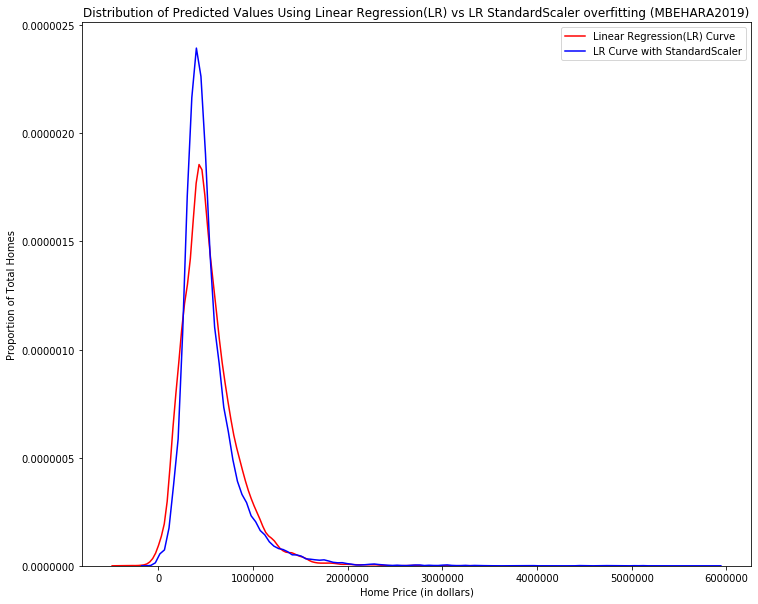

In [171]:
Title = 'Distribution of Predicted Values Using Linear Regression(LR) vs LR StandardScaler overfitting (MBEHARA2019)'
CurveFittingPlot(YhatLR, YhatLRScaler, "Linear Regression(LR) Curve", "LR Curve with StandardScaler", Title)

## Data Model Evaluation & Model Refinement

#### Using cross validation scoring, randomly split the dataset into training and testing to validate predictions

In [154]:
# Import 'cross validation scoring' & 'data model based training & testing' functions from scikit learn model selection library
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("imported cross_val_Score & train_test_split : DONE!")

# Use the same 11 features above(X) & price list(Y) to invoke function to split data for training and testing the model
#  use 85% of the data points to train the model & remaining to test the model   
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


imported cross_val_Score & train_test_split : DONE!
number of test samples : 3242
number of training samples: 18371


#### Ridge Regression is used as a sanity check for overfitting (in case of Standard Scaler with polynomial features)

In [155]:
# Import the Ridge Regression module from scikit learn
from sklearn.linear_model import Ridge

# Previously the numpy library is imported, so we proceed to 
# Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 
ridgeModel = Ridge(alpha=0.1)        # Create Ridge Object with regularization parameter alpha = 0.1
ridgeModel.fit(x_train, y_train)     # Fit the training data to the ridge regression model

# Predict the first five values of prices using the new linear regression model (this is a polynomial using all features)
YhatRR = ridgeModel.predict(x_train)

# Print the first 5 predicted values in the training dataset
print('First five training predicted values based on training data:', YhatRR[0:5])

# Predicted first five values of prices using the linear regression model earlier (this is a polynomial using all features)
print('First five training predicted values based on training data:', YhatLM[0:5])

rSquaredRidge = ridgeModel.score(x_train, y_train) # Determine R square using score() from the model training data 
print("\nR squared (variation) of price based on 11 variables \n----------------------------------------------------")
print("(1) Linear Regression(LR) model with best fit line  : ", rSquared)
print("(2) LR model model polynomial with over fitting     : ", rSquaredNew)
print("(3) Ridge Regression (regularization alpha = 0.1)   : ", rSquaredRidge)

# Comparing R squared for the polynomial function to the value computed using Ridge Regression should clue us in on 
#   how we could over fit data to using a Nth degree polynomial function


First five training predicted values based on training data: [[275713.30754538]
 [390736.16331647]
 [211345.26227606]
 [777363.70713514]
 [537144.1347721 ]]
First five training predicted values based on training data: [[283850.64176653]
 [662015.89176653]
 [307084.89176653]
 [408999.14176653]
 [532942.14176653]]

R squared (variation) of price based on 11 variables 
----------------------------------------------------
(1) Linear Regression(LR) model with best fit line  :  0.657679183672129
(2) LR model model polynomial with over fitting     :  0.7513408553851407
(3) Ridge Regression (regularization alpha = 0.1)   :  0.6594378534950245


#### Looking at how close the variance is between LR(0.6576) & RR(0.6594), the distribution curves will be almost identical 

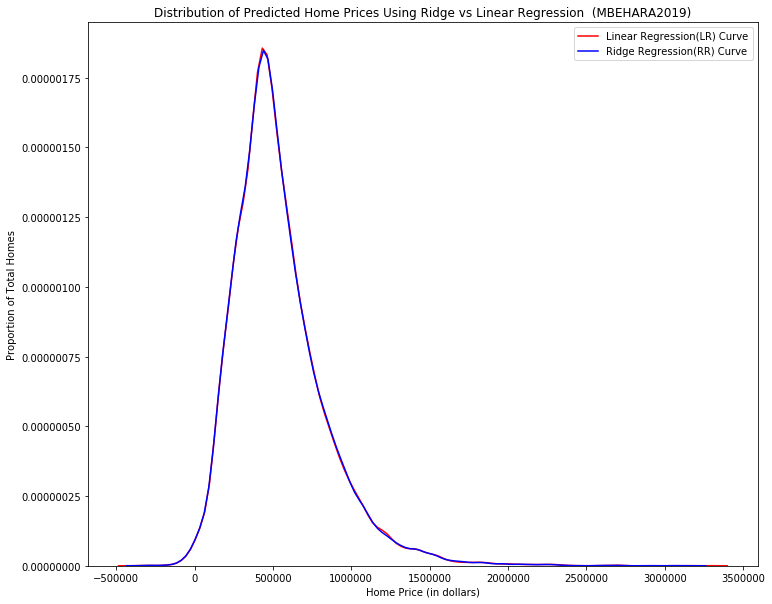

In [176]:
Title = 'Distribution of Predicted Home Prices Using Ridge vs Linear Regression  (MBEHARA2019)'
CurveFittingPlot(YhatLM, YhatRR, "Linear Regression(LR) Curve", "Ridge Regression(RR) Curve", Title)

In [139]:
# Perform a second order polynomial transformation on both training & testing data
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])
pr

# Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 
ridgeModelX = Ridge(alpha=0.1)        # Create Ridge Object with regularization parameter alpha = 0.1
ridgeModelX.fit(x_train_pr, y_train)  # Fit training data to the Ridge regression model post polynomial transformation

rSquaredRidgeX = ridgeModelX.score(x_test_pr, y_test) # Determine R square using score() from the model training data 

print("\nR squared (variation) of price based on 11 variables \n----------------------------------------------------")
print("(1) Linear Regression(LR) model with best fit line        : ", rSquared)
print("(2) LR model model polynomial with over fitting           : ", rSquaredNew)
print("(3) Ridge Regression(RR) (regularization alpha = 0.1)     : ", rSquaredRidge)
print("(4) RR model, 2nd order polynomial transform(alpha = 0.1) : ", rSquaredRidgeX)


R squared (variation) of price based on 11 variables 
----------------------------------------------------
(1) Linear Regression(LR) model with best fit line        :  0.657679183672129
(2) LR model model polynomial with over fitting           :  0.7513408553851407
(3) Ridge Regression(RR) (regularization alpha = 0.1)     :  0.6594378534950245
(4) RR model, 2nd order polynomial transform(alpha = 0.1) :  0.7002744279699229


In [157]:
# Predict the first five values of prices after second order polynomial transformation
YhatRRPT2 = ridgeModelX.predict(x_train_pr)

# Print the first 5 predicted values in the training dataset
print('First five values predicted based on training data:', YhatRRPT2[0:5])

First five values predicted based on training data: [343427.10651948 354349.95933431 256594.04757532 683541.24250724
 496086.09167206]


#### By Trial & Error we can see if the higher degree polynomial fits more of data (for instance 2nd order explains more here)

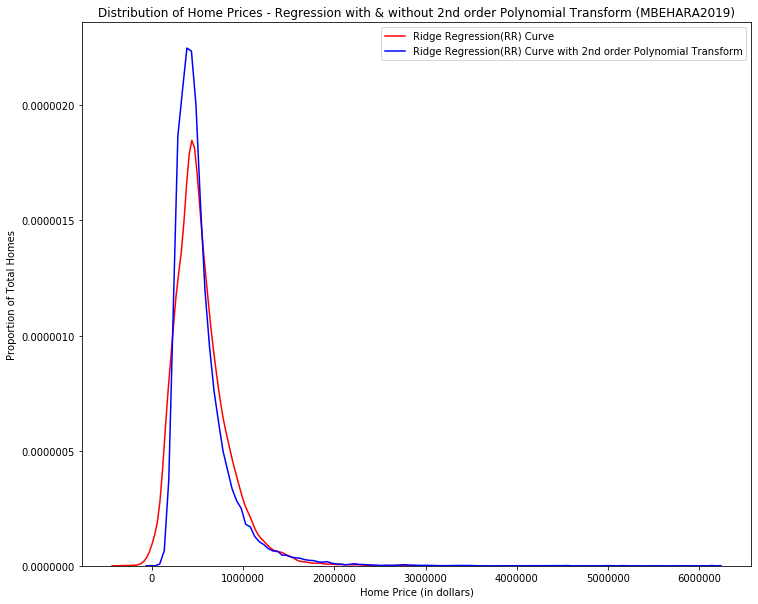

In [177]:
Title = 'Distribution of Home Prices - Regression with & without 2nd order Polynomial Transform (MBEHARA2019)'
CurveFittingPlot(YhatRR, YhatRRPT2, "Ridge Regression(RR) Curve", "Ridge Regression(RR) Curve with 2nd order Polynomial Transform", Title)

## End Of The Notebook